<a href="https://colab.research.google.com/github/KwameCode27/car-price-prediction/blob/main/Mobile_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn import metrics
import missingno as msno
from sklearn.impute import KNNImputer
#from sklearn.metrics import

Data Collection and Proccessing

### Key Factors to Consider Based on Your Dataset:

1. **Brand and Model**  
   - **Brand**: Popularity and trustworthiness can affect predictions.  
   - **Model**: Specific models may have unique selling points.  

2. **Hardware Specifications**  
   - **Screen Size (inch)**: Larger screens might appeal to gamers and multimedia users.  
   - **Battery (mAh)**: Essential for long usage without charging.  
   - **Storage (GB)**: Impacts the ability to store files and apps.  
   - **RAM (GB)**: Determines performance for multitasking.  

3. **Camera Features**  
   - **Main Camera**: Number of cameras and megapixels for photography quality.  
   - **Selfie Camera (MP)**: Important for social media and video calls.  

4. **Display and Resolution**  
   - **Display Type**: AMOLED or Super AMOLED for high-quality visuals.  
   - **Resolution**: Higher resolution for clearer displays.  

5. **Software and Features**  
   - **Operating System (OS)**: Affects app compatibility and updates.  
   - **SD Card Support**: Expandable storage can attract budget-conscious buyers.  
   - **SIM Card Type**: Single vs. Dual SIM options for flexibility.  

6. **Design and Color**  
   - **Color**: Aesthetic preferences could influence buying decisions.  

7. **Price (¢)**  
   - Pricing is a critical factor for affordability and market segmentation.  

8. **Market and Location Data**  
   - **Region**: Helps identify trends in specific geographic areas.  
   - **Location**: Useful for regional marketing strategies.  

In [3]:
#loading the data from csv file using pandas dataframe
mobile_dataset = pd.read_csv('/content/Mobile-Phones.csv')

In [4]:
#print first 5 rows of the dataset
mobile_dataset

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Samsung,Galaxy Note 20 5G,no,TRIPLE 12MP / 64MP / 12MP,1080 x 2400,AMOLED,NaN,Android,Orange,Greater Accra,Accra Metropolitan,NaN,4300.0,128.0,NaN,10.0,2850.0
3596,LG,Stylo 6,yes,"3 Cameras: 13, 5, 5 MP",1080 x 2460,IPS,Nano-SIM,Android,Other,Ashanti,Kumasi Metropolitan,5.10,4000.0,64.0,8.0,13.0,1060.0
3597,Other Brand,Other Models,no,NaN,NaN,NaN,NaN,NaN,Black,Greater Accra,Circle,4.00,NaN,32.0,2.0,NaN,880.0
3598,Nokia,110,yes,1 Cameras: 03 MP,128 x 160,TFT,Dual,NaN,Black,Greater Accra,Circle,4.00,1020.0,4.0,NaN,NaN,299.0


In [6]:
# checking the number of row and columns
mobile_dataset.shape

(3600, 17)

In [7]:
# some info about the dataset
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              3600 non-null   object 
 1   model              3600 non-null   object 
 2   sd_card            3600 non-null   object 
 3   main_camera        3365 non-null   object 
 4   resolution         3064 non-null   object 
 5   display            3034 non-null   object 
 6   sim_card           2810 non-null   object 
 7   os                 3381 non-null   object 
 8   color              3600 non-null   object 
 9   region             3600 non-null   object 
 10  location           3600 non-null   object 
 11  screen_size(inch)  3473 non-null   float64
 12  battery(mAh)       3430 non-null   float64
 13  storage(GB)        3597 non-null   float64
 14  ram(GB)            2812 non-null   float64
 15  selfie_camera(MP)  3293 non-null   float64
 16  price(¢)           3600 

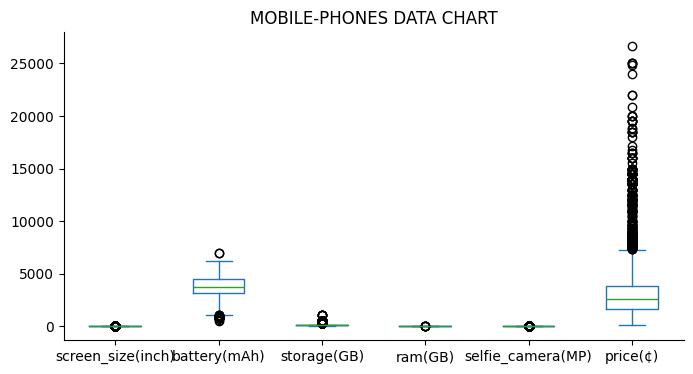

In [ ]:
mobile_dataset.plot(kind='box', figsize=(8, 4), title='MOBILE-PHONES DATA CHART')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
# checking the missing values
mobile_dataset.isnull().sum()

,0
brand,0
model,0
sd_card,0
main_camera,235
resolution,536
display,566
sim_card,790
os,219
color,0
region,0


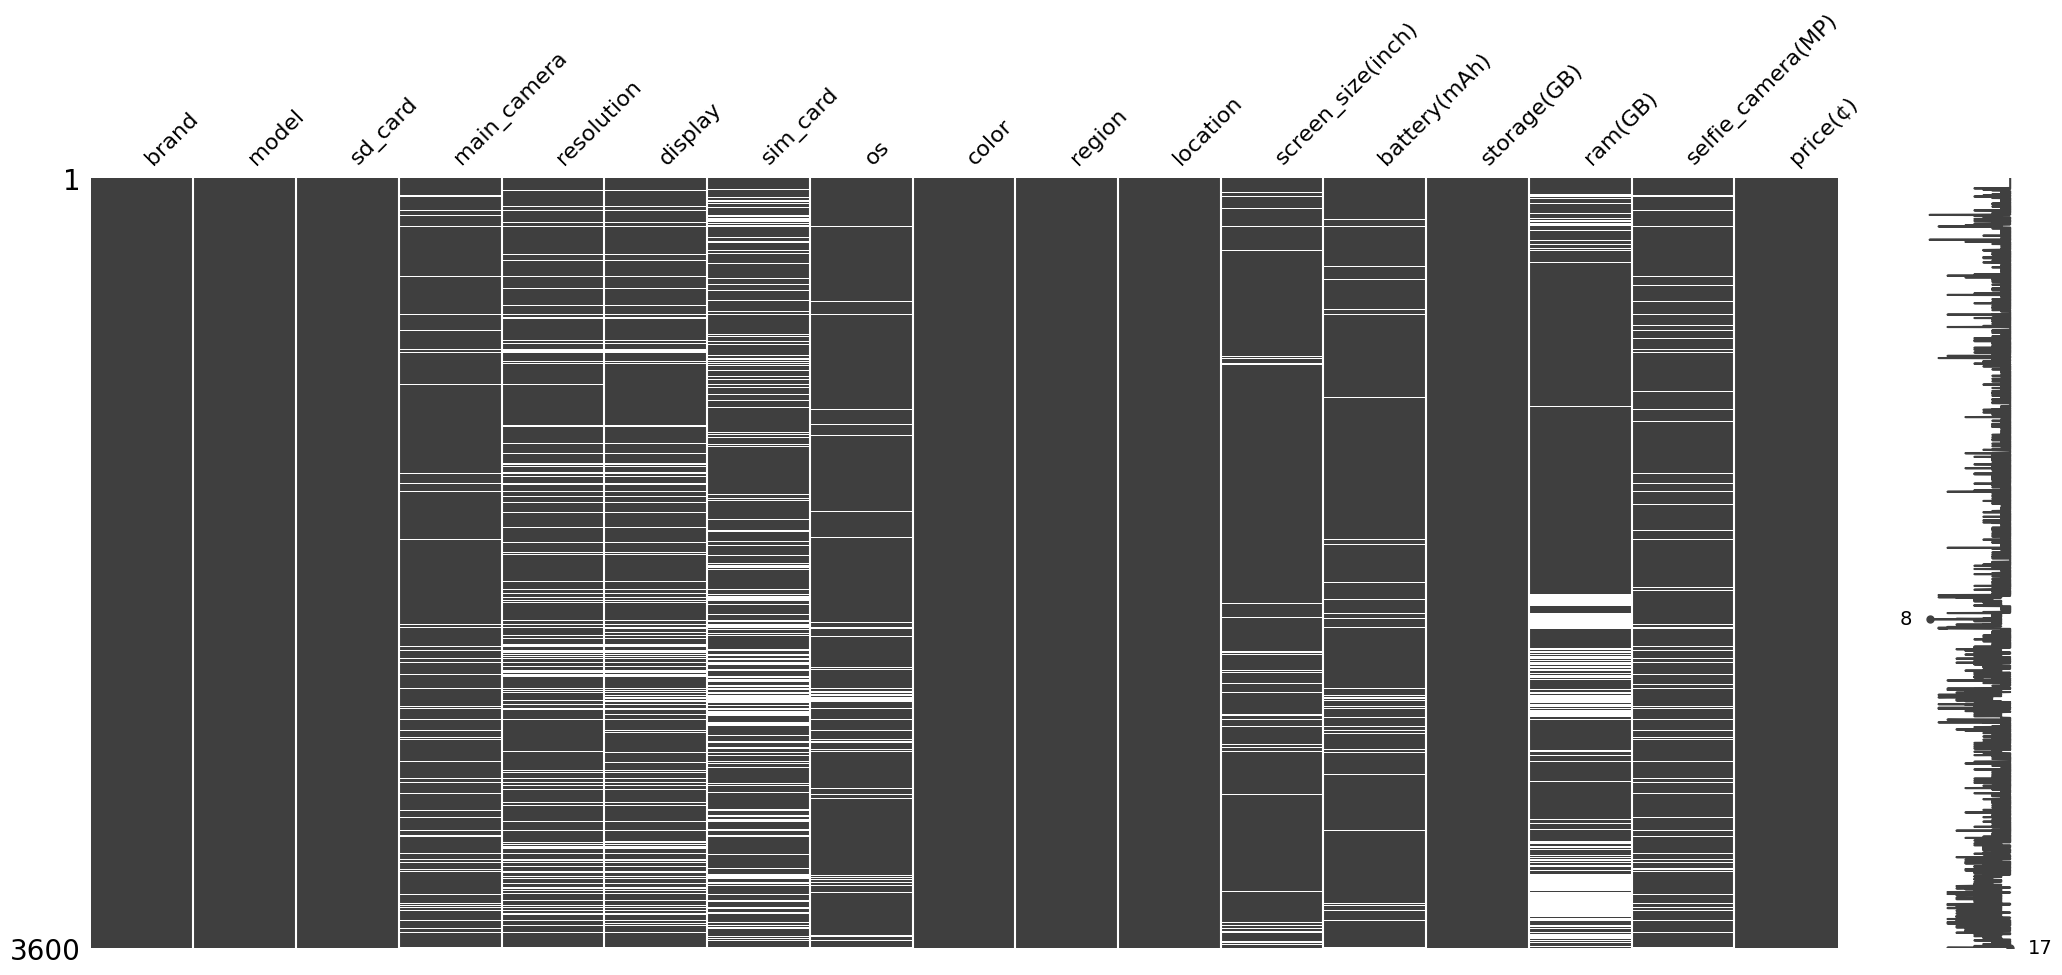

In [19]:
# Visualize missing data patterns
msno.matrix(mobile_dataset)
plt.show()

In [10]:
mobile_dataset.describe()

,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
count,3473.000000,3430.000000,3597.000000,2812.000000,3293.000000,3600.000000
mean,5.904221,3788.813703,145.168752,6.143670,13.059824,3442.216667
std,0.582931,896.597135,109.056178,2.750244,9.454200,3037.076480
min,1.800000,520.000000,4.000000,1.000000,0.000000,110.000000
25%,5.800000,3110.000000,64.000000,4.000000,8.000000,1600.000000
50%,6.100000,3700.000000,128.000000,6.000000,10.000000,2600.000000
75%,6.100000,4500.000000,128.000000,8.000000,13.000000,3850.000000
max,7.600000,7000.000000,1024.000000,16.000000,40.000000,26650.000000


In [12]:
# Check the data types and basic statistics
mobile_dataset.dtypes

,0
brand,object
model,object
sd_card,object
main_camera,object
resolution,object
display,object
sim_card,object
os,object
color,object
region,object


In [13]:
mobile_dataset.describe(include='all')

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
count,3600,3600,3600,3365,3064,3034,2810,3381,3600,3600,3600,3473.000000,3430.000000,3597.000000,2812.000000,3293.000000,3600.000000
unique,21,404,2,125,68,19,3,10,15,3,70,NaN,NaN,NaN,NaN,NaN,NaN
top,Samsung,iPhone X,yes,1 Cameras: 12 MP,1080 x 2400,IPS LCD,Dual,Android,Black,Greater Accra,Circle,NaN,NaN,NaN,NaN,NaN,NaN
freq,1659,85,1848,611,470,635,1140,2704,1700,3402,967,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.904221,3788.813703,145.168752,6.143670,13.059824,3442.216667
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.582931,896.597135,109.056178,2.750244,9.454200,3037.076480
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,520.000000,4.000000,1.000000,0.000000,110.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800000,3110.000000,64.000000,4.000000,8.000000,1600.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100000,3700.000000,128.000000,6.000000,10.000000,2600.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100000,4500.000000,128.000000,8.000000,13.000000,3850.000000


In [18]:
mobile_dataset.head()

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,1,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,1,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,1,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,1,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,1,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0


In [17]:
mobile_dataset.tail()

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
3595,Samsung,Galaxy Note 20 5G,no,TRIPLE 12MP / 64MP / 12MP,1080 x 2400,AMOLED,NaN,1,Orange,Greater Accra,Accra Metropolitan,NaN,4300.0,128.0,NaN,10.0,2850.0
3596,LG,Stylo 6,yes,"3 Cameras: 13, 5, 5 MP",1080 x 2460,IPS,Nano-SIM,1,Other,Ashanti,Kumasi Metropolitan,5.1,4000.0,64.0,8.0,13.0,1060.0
3597,Other Brand,Other Models,no,NaN,NaN,NaN,NaN,NaN,Black,Greater Accra,Circle,4.0,NaN,32.0,2.0,NaN,880.0
3598,Nokia,110,yes,1 Cameras: 03 MP,128 x 160,TFT,Dual,NaN,Black,Greater Accra,Circle,4.0,1020.0,4.0,NaN,NaN,299.0
3599,Apple,iPhone 13 Pro,no,1 Cameras: 12 MP,1170 x 2532,OLED,Single,IOS,Black,Greater Accra,Circle,5.1,3095.0,256.0,16.0,12.0,11500.0


Checking the Distribution of Categorial data

In [16]:
mobile_dataset.brand.value_counts()

,count
brand,
Samsung,1659
Apple,804
Huawei,291
Google,261
LG,234
Tecno,127
Infinix,61
Itel,40
Nokia,30


In [17]:
mobile_dataset.os.value_counts()

,count
os,
Android,2704
IOS,562
iOS,105
Harmony,4
Symbian,1
Windows Mobile,1
Nucleus OS,1
Java,1
5000,1


In [18]:
mobile_dataset.sd_card.value_counts()

,count
sd_card,
yes,1848
no,1752


In [19]:
mobile_dataset.sim_card.value_counts()

,count
sim_card,
Dual,1140
Single,894
Nano-SIM,776


In [23]:
# Encoding SD_Card
mobile_dataset.replace({'sd_card':{'Yes': 1, 'No': 0}}, inplace=True)

In [21]:
# # Encoding sim_card
# mobile_dataset.replace({'sim_card':{'Single SIM': 1, 'Dual SIM': 0}}, inplace=True)

In [22]:
# # Encoding os
# mobile_dataset.replace({'os':{'Android': 1, 'iOS': 0, 'Harmony':2, }}, inplace=True)

In [24]:
mobile_dataset

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,1,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,1,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,1,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,1,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,1,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Samsung,Galaxy Note 20 5G,no,TRIPLE 12MP / 64MP / 12MP,1080 x 2400,AMOLED,NaN,1,Orange,Greater Accra,Accra Metropolitan,NaN,4300.0,128.0,NaN,10.0,2850.0
3596,LG,Stylo 6,yes,"3 Cameras: 13, 5, 5 MP",1080 x 2460,IPS,Nano-SIM,1,Other,Ashanti,Kumasi Metropolitan,5.10,4000.0,64.0,8.0,13.0,1060.0
3597,Other Brand,Other Models,no,NaN,NaN,NaN,NaN,NaN,Black,Greater Accra,Circle,4.00,NaN,32.0,2.0,NaN,880.0
3598,Nokia,110,yes,1 Cameras: 03 MP,128 x 160,TFT,Dual,NaN,Black,Greater Accra,Circle,4.00,1020.0,4.0,NaN,NaN,299.0


Visualize Distribution of Price

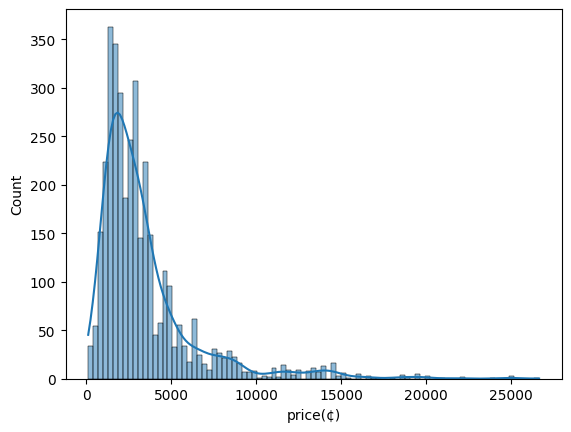

In [38]:
sns.histplot(mobile_dataset['price(¢)'], kde=True)
plt.show()

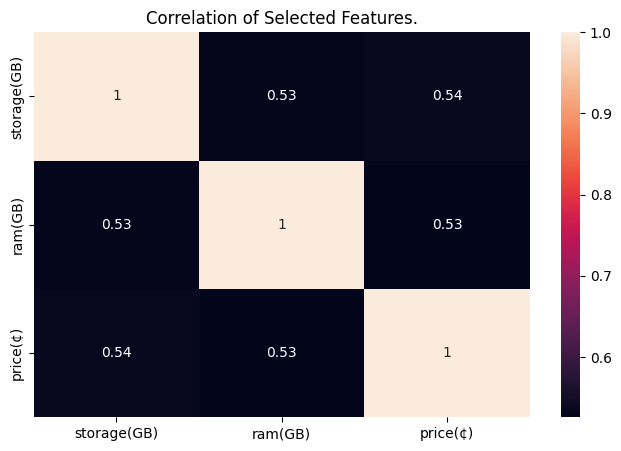

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(mobile_dataset[['storage(GB)','ram(GB)','price(¢)']].corr(), annot=True)
plt.title("Correlation of Selected Features.")
plt.show()

Data Cleaning

In [28]:
# Replace missing values with 0 (or other strategies)
mobile_dataset.fillna(0, inplace=True)

In [29]:
mobile_dataset = pd.get_dummies(mobile_dataset, columns=['brand', 'os', 'color'], drop_first=True)

Extract Camera Details

In [30]:
# Number of cameras
mobile_dataset['num_cameras'] = mobile_dataset['main_camera'].str.count(',') + 1

Convert resolution to megapixels